In [1]:
import pandas as pd
#import wget
import matplotlib.pyplot as plt

# load the training dataset
#enlace = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv'
#wget.download(enlace)

bike_data = pd.read_csv('daily-bike-share.csv')

Creacion de columna dia

In [2]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'rentals']
bike_data[numeric_features].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


C:\Users\ivana\anaconda3\envs\ensembles\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


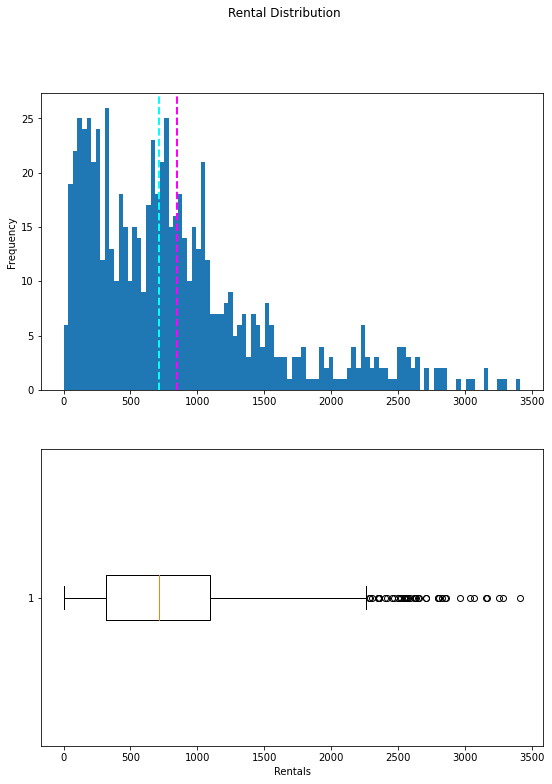

In [4]:
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()


Los gráficos muestran que el número de alquileres diarios oscila entre 0 y poco más de 3400. Sin embargo, la cantidad media (y mediana) de alquileres diarios está más cerca del extremo inferior de ese rango, con la mayoría de los datos entre 0 y alrededor de 2200 alquileres. Los pocos valores por encima de esto se muestran en el diagrama de caja como pequeños círculos, lo que indica que son valores atípicos; en otras palabras, valores inusualmente altos o bajos más allá del rango típico de la mayoría de los datos. Podemos hacer el mismo tipo de exploración visual de las características numéricas. Vamos a crear un histograma para cada uno de estos.

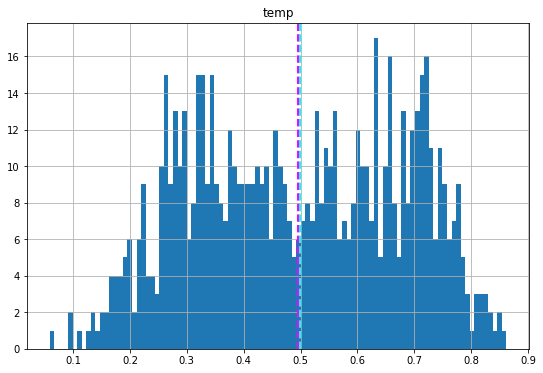

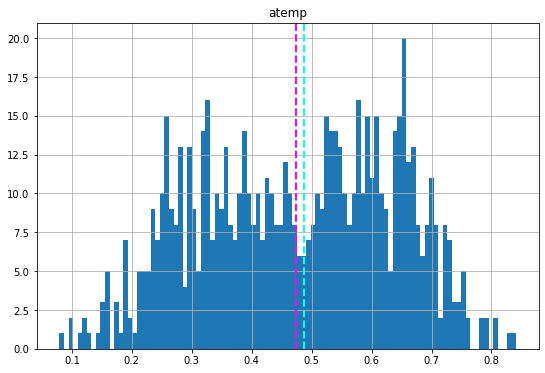

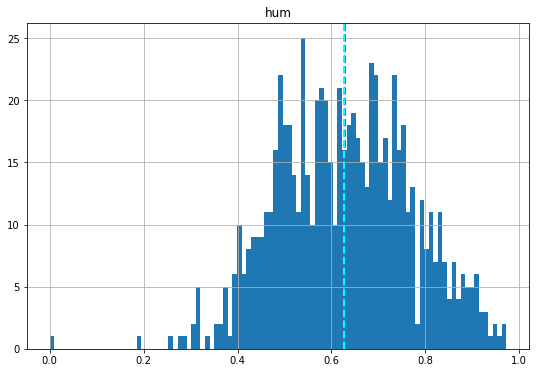

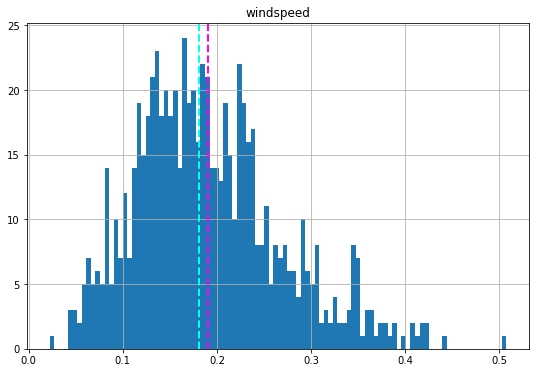

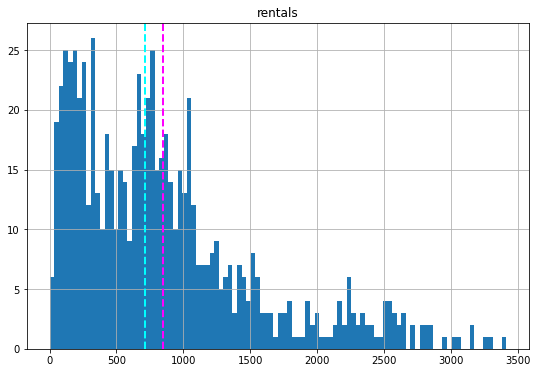

In [5]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Las características numéricas parecen tener una distribución más normal, con la media y la mediana más cerca de la mitad del rango de valores, coincidiendo con el lugar donde se encuentran los valores más comunes. 

Nota: Las distribuciones no son realmente normales en el sentido estadístico, lo que daría como resultado un histograma de "curva de campana" suave y simétrico con la media y la moda (el valor más común) en el centro; pero generalmente indican que la mayoría de las observaciones tienen un valor cercano al medio. 

Hemos explorado la distribución de los valores numéricos en el conjunto de datos, pero ¿qué pasa con las características categóricas? Estos no son números continuos en una escala, por lo que no podemos usar histogramas; pero podemos trazar un gráfico de barras que muestre el recuento de cada valor discreto para cada categoría.

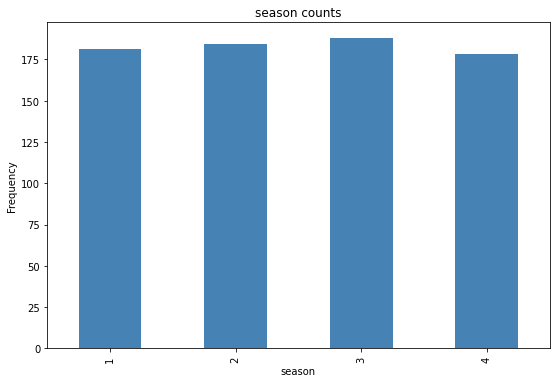

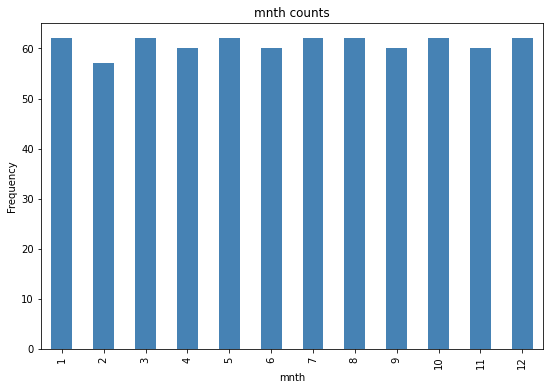

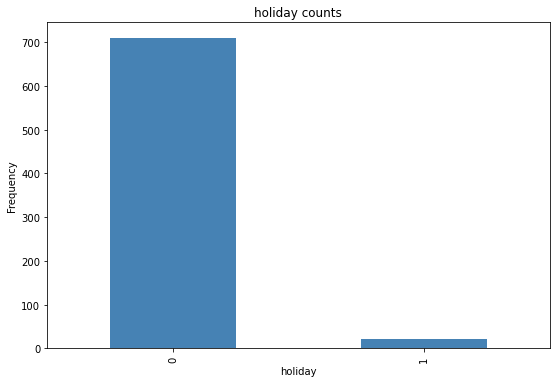

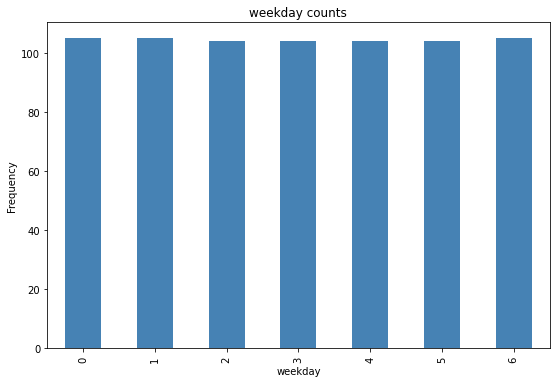

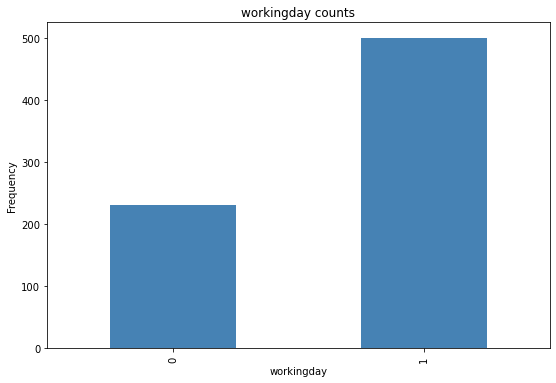

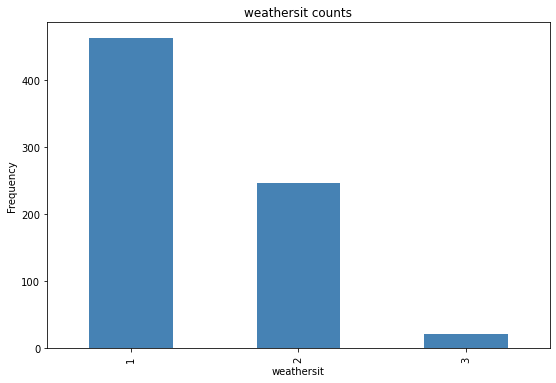

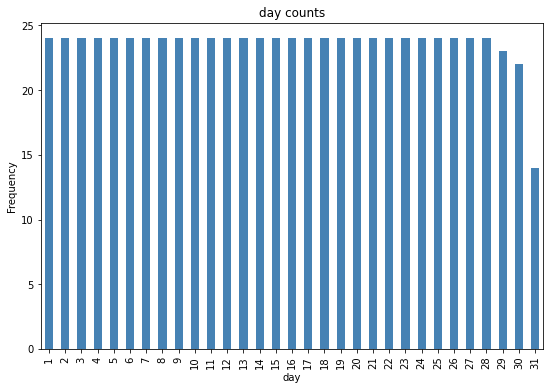

In [6]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Muchas de las características categóricas muestran una distribución más o menos *uniforme* (lo que significa que hay aproximadamente el mismo número de filas para cada categoría). Las excepciones a esto incluyen: 

- **vacaciones**: Hay muchos menos días que son vacaciones que días que no lo son. 
- **día laborable**: Hay más días laborables que no laborables. 
- **weathersit**: la mayoría de los días son de categoría *1* (claro), con categoría *2* (niebla y nubes) la siguiente más común. Hay comparativamente pocos días de categoría *3* (lluvia ligera o nieve) y ningún día de categoría *4* (lluvia intensa, granizo o niebla). 

Ahora que sabemos algo sobre la distribución de los datos en nuestras columnas, podemos comenzar a buscar relaciones entre las características y la etiqueta de **alquileres** que queremos poder predecir. 

Para las funciones numéricas, podemos crear diagramas de dispersión que muestren la intersección de los valores de las funciones y las etiquetas. También podemos calcular la estadística de *correlación* para cuantificar la relación aparente.

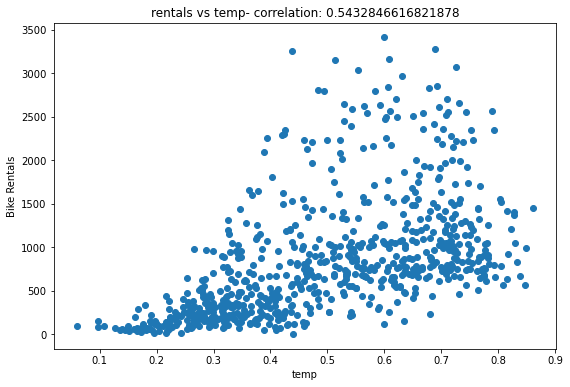

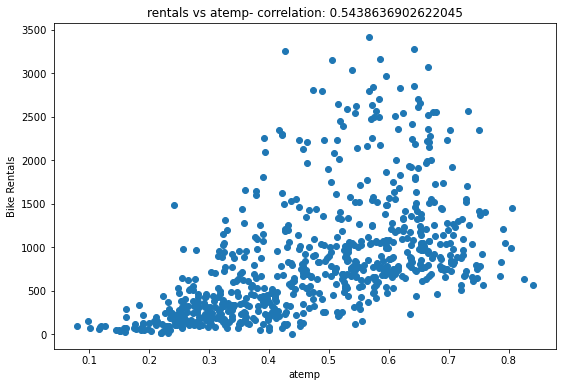

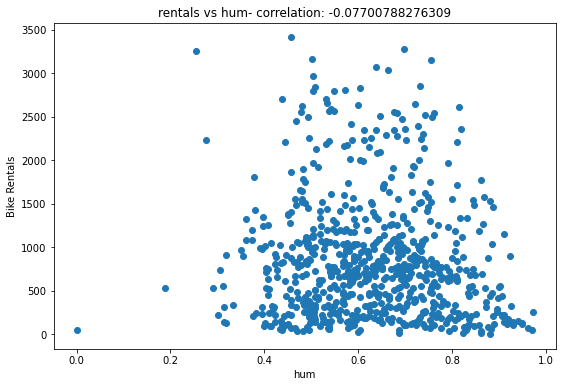

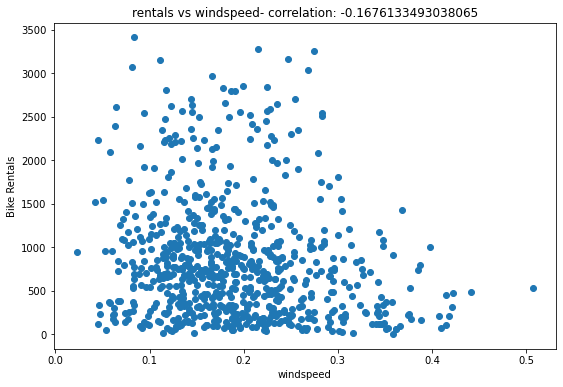

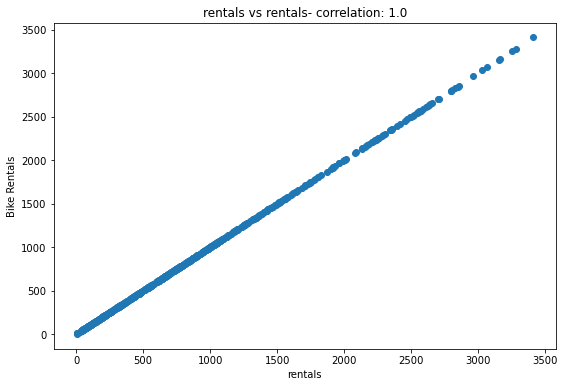

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


Los resultados no son concluyentes, pero si observa detenidamente los diagramas de dispersión de temp y atemp, puede ver una vaga tendencia diagonal que muestra que los recuentos de alquiler más altos tienden a coincidir con temperaturas más altas; y un valor de correlación de poco más de 0,5 para ambas características respalda esta observación. Por el contrario, los gráficos de zumbido y velocidad del viento muestran una correlación ligeramente negativa, lo que indica que hay menos alquileres en días con alta humedad o velocidad del viento. Ahora comparemos las características categóricas con la etiqueta. Haremos esto mediante la creación de diagramas de caja que muestren la distribución de los recuentos de alquiler para cada categoría.

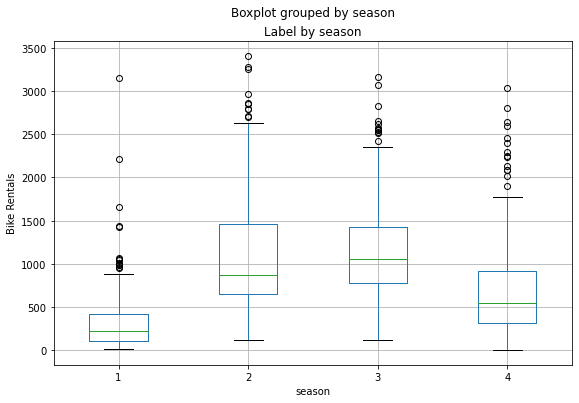

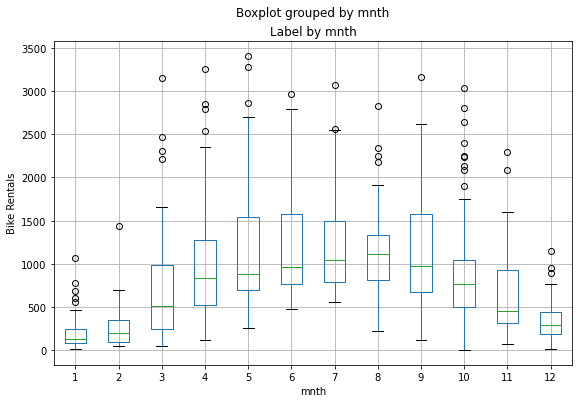

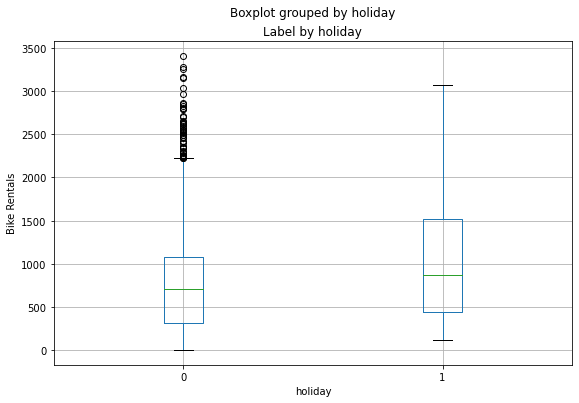

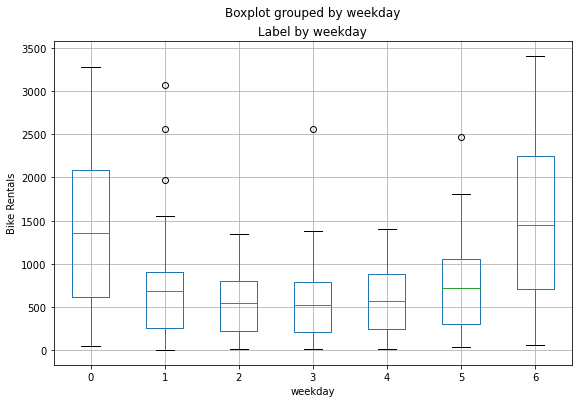

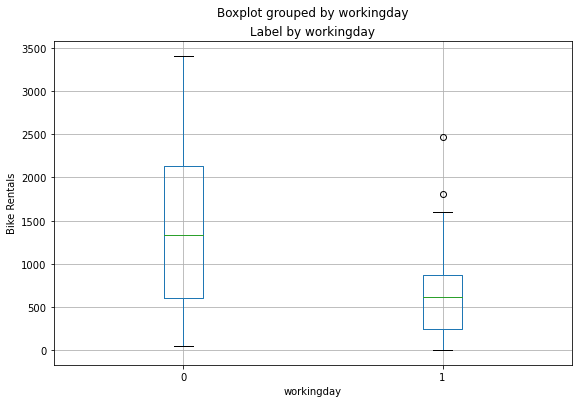

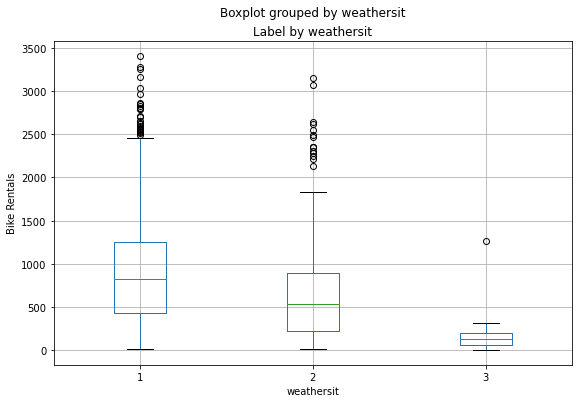

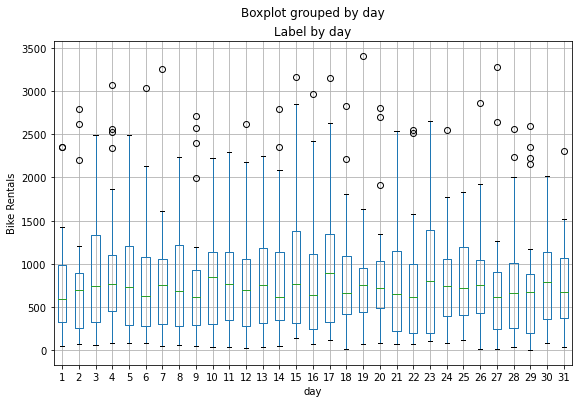

In [8]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Los gráficos muestran cierta variación en la relación entre algunos valores de categoría y los alquileres. Por ejemplo, hay una clara diferencia en la distribución de los alquileres los fines de semana (día laborable 0 o 6) y los de la semana laboral (día laborable 1 a 5). Del mismo modo, existen diferencias notables para las categorías de días festivos y laborables. Hay una tendencia notable que muestra diferentes distribuciones de alquiler en los meses de verano y otoño en comparación con los meses de primavera e invierno. La categoría weathersit también parece marcar la diferencia en la distribución de alquileres. La función de día que creamos para el día del mes muestra poca variación, lo que indica que probablemente no predice la cantidad de alquileres.

## Entrena un modelo de regresión 

Ahora que hemos explorado los datos, es hora de usarlos para entrenar un modelo de regresión que use las funciones que hemos identificado como potencialmente predictivas para predecir la etiqueta de **alquileres**. Lo primero que debemos hacer es separar las características que queremos usar para entrenar el modelo de la etiqueta que queremos que prediga.

In [9]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

Después de separar el conjunto de datos, ahora tenemos matrices numpy llamadas **X** que contienen las características e **y** que contienen las etiquetas. *Podríamos* entrenar un modelo usando todos los datos; pero es una práctica común en el aprendizaje supervisado dividir los datos en dos subconjuntos; un conjunto (normalmente más grande) con el que entrenar el modelo y un conjunto de "retención" más pequeño con el que validar el modelo entrenado. Esto nos permite evaluar qué tan bien funciona el modelo cuando se usa con el conjunto de datos de validación al comparar los datos previos *al azar* (en lugar de tomar el primer 70 % de los datos para el entrenamiento y guardar el resto para la validación). Esto ayuda a garantizar que los dos subconjuntos de datos sean estadísticamente comparables (por lo que validamos el modelo con datos que tienen una distribución estadística similar a los datos con los que se entrenó). Para dividir aleatoriamente los datos, usaremos la función **train_test_split** en la biblioteca **scikit-learn**. Esta biblioteca es uno de los paquetes de aprendizaje automático más utilizados para Python.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=775)


Ahora tenemos los siguientes cuatro conjuntos de datos: 

- **X_train**: los valores de características que usaremos para entrenar el modelo 
- **y_train**: Las etiquetas correspondientes que usaremos para entrenar el modelo 
- **X_test**: Los valores de característica que usaremos para validar el modelo 
- **y_test**: Las etiquetas correspondientes que usaremos para validar el modelo. 

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento. 
Usaremos un algoritmo de *regresión lineal*, un punto de partida común para la regresión que funciona tratando de encontrar una relación lineal entre los valores *X* y la etiqueta *y*. 
El modelo resultante es una función que define conceptualmente una línea donde se cruzan todas las combinaciones posibles de valores X e Y.

En Scikit-Learn, los algoritmos de entrenamiento están encapsulados en *estimadores* y, en este caso, usaremos el estimador **LinearRegression** para entrenar un modelo de regresión lineal.

In [11]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### Evaluar el modelo entrenado 

Ahora que hemos entrenado el modelo, podemos usarlo para predecir los recuentos de alquiler de las funciones que retuvimos en nuestro conjunto de datos de validación. Luego, podemos comparar estas predicciones con los valores reales de las etiquetas para evaluar qué tan bien (¡o no!) está funcionando el modelo.

In [12]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 955.  618. 1229.  590. 1894. 1090.  361.  556.  802.  332.]
Actual labels   :  [ 898  834 1433  315 2827 1325  470 1014  440  233]


Comparar cada predicción con su correspondiente valor real de "verdad fundamental" no es una forma muy eficiente de determinar qué tan bien está prediciendo el modelo. Veamos si podemos obtener una mejor indicación visualizando un diagrama de dispersión que compare las predicciones con las etiquetas reales. También superpondremos una línea de tendencia para tener una idea general de qué tan bien se alinean las etiquetas pronosticadas con las etiquetas verdaderas.

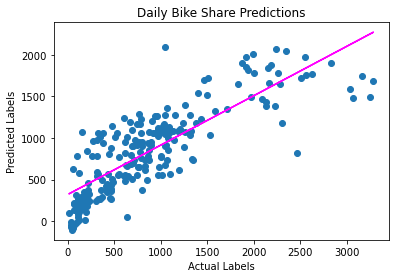

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Hay una tendencia diagonal definida, y las intersecciones de los valores pronosticados y reales generalmente siguen la ruta de la línea de tendencia; pero hay una gran diferencia entre la función ideal representada por la línea y los resultados. Esta varianza representa los residuos del modelo; en otras palabras, la diferencia entre la etiqueta predicha cuando el modelo aplica los coeficientes que aprendió durante el entrenamiento a los datos de validación y el valor real de la etiqueta de validación. Estos residuos, cuando se evalúan a partir de los datos de validación, indican el nivel esperado de error cuando el modelo se usa con datos nuevos para los que se desconoce la etiqueta.


Puede cuantificar los residuos calculando una serie de métricas de evaluación de uso común. Nos centraremos en los tres siguientes: 
- **Error cuadrático medio (MSE)**: La media de las diferencias al cuadrado entre los valores predichos y reales. Esto produce una métrica relativa en la que cuanto menor sea el valor, mejor será el ajuste del modelo. 
- **Error cuadrático medio (RMSE)**: La raíz cuadrada del MSE. Esto produce una métrica absoluta en la misma unidad que la etiqueta (en este caso, el número de alquileres). Cuanto menor sea el valor, mejor será el modelo (en un sentido simple, ¡representa el número promedio de alquileres en los que las predicciones son incorrectas!) 
- **Coeficiente de determinación (generalmente conocido como *R-squared* o R<sup>2</sup>**): una métrica relativa en la que cuanto mayor sea el valor, mejor será el ajuste del modelo. En esencia, esta métrica representa la cantidad de variación entre los valores de etiqueta predichos y reales que el modelo puede explicar.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 176607.51770046703
RMSE: 420.24697226805455
R2: 0.6646682465176841


Así que ahora hemos cuantificado la capacidad de nuestro modelo para predecir el número de alquileres. Definitivamente tiene *algún* poder predictivo, ¡pero probablemente podamos hacerlo mejor!

## Resumen

Aquí hemos explorado nuestros datos y ajustamos un modelo de regresión básico. En el próximo cuaderno, probaremos una serie de otros algoritmos de regresión para mejorar el rendimiento.

## Otras lecturas
Para obtener más información sobre Scikit-Learn, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evalue.html#regression-metrics).